# Covid Era Work

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
plt.rcParams["figure.figsize"] = (7.5,5)

def combineMultipleScans(df, colName, newName=None):
    cols = list(filter(lambda col: colName in col, df.columns))
    n = len(cols)
    if newName == None:
        newName = "{0} (n={1})".format(colName, n)
    df[newName] = (df[cols].sum(axis=1))/n
    df.drop(columns=cols, inplace=True)

def setWLSAxis(ax):
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylabel("Absorbance (A)")
    
def getLinearFits(df, xcol, ycols):
    linearFits = {}
    for col in ycols:
        linearFits[col] = scipy.stats.linregress(df[xcol], df[col])
    return pd.DataFrame(linearFits, index=["slope", "intercept", "r_value", "p_value", "std_err"])

## AuNP-B1 Synthesis

In [2]:
AuNPB1 = pd.read_excel("05272020-AuNP-B1-FULLBANDSCAN.xlsx", skiprows=12, index_col=0, 
              usecols=lambda x: x not in ["No."])
display(AuNPB1)

,BLANK,ABS1,ABS2,ABS3,ABS4,ABS5,Average
Wavelength,,,,,,,
750.0,0.0001,0.3027,0.3043,0.3050,0.3050,0.3071,0.30482
749.8,0.0002,0.3027,0.3048,0.3053,0.3054,0.3073,0.30510
749.6,0.0002,0.3031,0.3045,0.3055,0.3056,0.3076,0.30526
749.4,0.0000,0.3039,0.3052,0.3060,0.3061,0.3085,0.30594
749.2,-0.0002,0.3043,0.3057,0.3066,0.3069,0.3088,0.30646
...,...,...,...,...,...,...,...
400.8,-0.0002,2.4351,2.4265,2.4265,2.4098,2.4181,2.42320
400.6,0.0001,2.4338,2.4252,2.4252,2.4085,2.4085,2.42024
400.4,0.0001,2.4325,2.4239,2.4239,2.4073,2.4073,2.41898


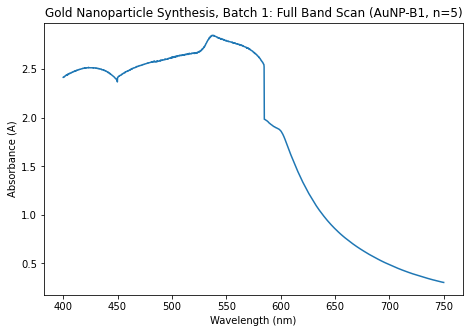

In [3]:
ax = sns.lineplot(x=AuNPB1.index, y="Average", data=AuNPB1)
ax.set_title("Gold Nanoparticle Synthesis, Batch 1: Full Band Scan (AuNP-B1, n=5)")
setWLSAxis(ax)

### Concentration Calculations

In [4]:
AuNPB1Conc = pd.read_excel("05272020-AuNP-B1-AND-NOCITRATE.xlsx", skiprows=11, index_col=0,
                       usecols=lambda x: not any(s in x for s in ["Unnamed", "Remark", "Conc."]))
display(AuNPB1Conc) # all measurements take @ 525nm

,Name,Abs.,Tran.,Status,Measuring time
No.,,,,,
1,blank,0.0001,99.9759,Measured,2020-05-27 20:35:13.000004
2,blank,0.0001,99.9759,Measured,2020-05-27 20:35:13.999998
3,blank,0.0001,99.9799,Measured,2020-05-27 20:35:16.999996
4,blank,0.0000,100.0040,Measured,2020-05-27 20:35:17.999998
5,blank,0.0001,99.9718,Measured,2020-05-27 20:35:19.000000
6,aunp-b1,2.6550,0.2213,Measured,2020-05-27 20:35:25.999999
7,aunp-b1,2.6550,0.2213,Measured,2020-05-27 20:35:27.000001
8,aunp-b1,2.6550,0.2213,Measured,2020-05-27 20:35:28.000003
9,aunp-b1,2.6550,0.2213,Measured,2020-05-27 20:35:28.999997


using the Beer-Lambert law $A=\epsilon\cdot l \cdot c$ with a pathlength $l=$1cm and an extinction
coefficient of $2.7\cdot10^8$ M$^{−1}$ cm$^{−1}$ at 525 nm, we have:
$$c=\frac{A}{2.7}10^{-8}M=\frac{10\cdot A}{2.7}nM$$
Constant from [Alsager2015](https://pubs.acs.org/doi/10.1021/acs.analchem.5b00335): "The
concentration of AuNPs was estimated to be 14 nM from the
calculation based on the Beer−Lambert law using an extinction
coefficient of $2.7\cdot10^8 M^{−1} cm^{−1}$ at 525 nm."

In [5]:
mean = AuNPB1Conc.groupby("Name").mean()
mean["Concentration (nM)"] = (10*mean["Abs."]/2.7)
display(mean)
nocTransferRatio = (mean.loc["aunp-b1-noc"]["Concentration (nM)"]/mean.loc["aunp-b1"]["Concentration (nM)"])*100
print("De-citrated sample transfer percentage: {}%".format(round(nocTransferRatio)))

,Abs.,Tran.,Concentration (nM)
Name,,,
aunp-b1,2.65579,0.22090,9.836259
aunp-b1-noc,2.27899,0.52600,8.440704
blank,0.00008,99.98149,0.000296


De-citrated sample transfer percentage: 86%


A transfer percentage of 86% doesn't make sense, as we expect the upper bound to be 33% since the last step involved a 3X dilution. 

**TODO:We need to do a dilution curve of AuNP-B1 to ensure linearity / test for equipment issues.**

with these numbers, I added Alsa1535 (an E2 aptamer) for a 1:3 Au:Apt ratio (75.969pmol for 3mL of AuNP-B1-NOC)

In [6]:
SaltAndAptamer = pd.read_excel("05272020-APTAMER-AND-SALT-ADDITIONS.xlsx", skiprows=12, index_col=0,
                       usecols=lambda x: not any(s in x for s in ["No.", "Unnamed", "Remark", "Conc.", "Abs10", "Visible"]))
display(SaltAndAptamer)

#SaltAndAptamer["AuNP-B1"] = (SaltAndAptamer["AuNP-B1"]+SaltAndAptamer["AuNP-B1.1"])/2
#SaltAndAptamer.drop(columns=["AuNP-B1.1"], inplace=True)

for sample in ["Post Alsa1535", "AuNP-B1"]:
    combineMultipleScans(SaltAndAptamer, sample)


SaltAndAptamer.rename(columns={
    "Salt1": "NaCl (7.93mM)",
    "Salt2": "NaCl (15.9mM)",
    "Salt3": "NaCl (23.8mM)"
}, inplace=True)
display(SaltAndAptamer)

,Post Alsa1535,Post Alsa1535.1,Post Alsa1535.2,AuNP-B1,AuNP-B1.1,Salt1,Salt2,Salt3,Re-scan for equib verification
Wavelength,,,,,,,,,
750.0,0.0877,0.0877,0.0875,0.3142,0.3142,0.1458,0.1903,0.2531,0.2688
749.8,0.0879,0.0877,0.0877,0.3148,0.3144,0.1457,0.1907,0.2530,0.2694
749.6,0.0881,0.0879,0.0879,0.3153,0.3152,0.1461,0.1906,0.2536,0.2695
749.4,0.0882,0.0881,0.0878,0.3157,0.3157,0.1464,0.1907,0.2536,0.2696
749.2,0.0884,0.0885,0.0880,0.3163,0.3164,0.1462,0.1911,0.2541,0.2706
...,...,...,...,...,...,...,...,...,...
400.8,1.3628,1.3621,1.3606,2.4094,2.4094,1.3562,1.3462,1.3350,1.3322
400.6,1.3635,1.3621,1.3613,2.4079,2.4161,1.3569,1.3468,1.3356,1.3328
400.4,1.3636,1.3621,1.3621,2.4065,2.4148,1.3577,1.3475,1.3362,1.3335


,NaCl (7.93mM),NaCl (15.9mM),NaCl (23.8mM),Re-scan for equib verification,Post Alsa1535 (n=3),AuNP-B1 (n=2)
Wavelength,,,,,,
750.0,0.1458,0.1903,0.2531,0.2688,0.087633,0.31420
749.8,0.1457,0.1907,0.2530,0.2694,0.087767,0.31460
749.6,0.1461,0.1906,0.2536,0.2695,0.087967,0.31525
749.4,0.1464,0.1907,0.2536,0.2696,0.088033,0.31570
749.2,0.1462,0.1911,0.2541,0.2706,0.088300,0.31635
...,...,...,...,...,...,...
400.8,1.3562,1.3462,1.3350,1.3322,1.361833,2.40940
400.6,1.3569,1.3468,1.3356,1.3328,1.362300,2.41200
400.4,1.3577,1.3475,1.3362,1.3335,1.362600,2.41065


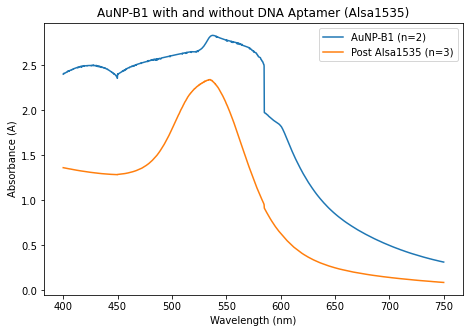

In [7]:
ax = SaltAndAptamer[["AuNP-B1 (n=2)", "Post Alsa1535 (n=3)"]].plot()
setWLSAxis(ax)
ax.set_title("AuNP-B1 with and without DNA Aptamer (Alsa1535)")
plt.savefig("rawAuNPwithandwithoutAptamer.png", dpi=300)

A .. very interesting change in the absorbtion spectra when the aptamer is introduced - no visual change was detectable.

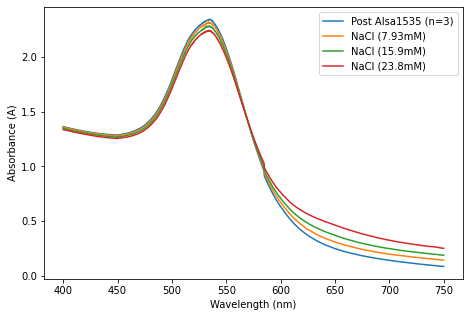

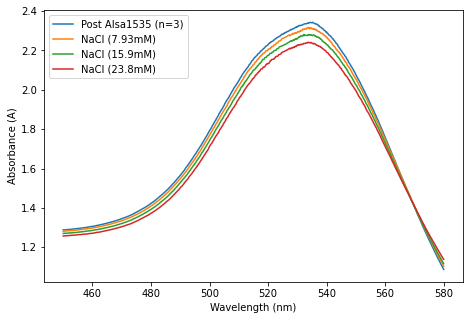

In [8]:
ax = SaltAndAptamer[["Post Alsa1535 (n=3)"]+[x for x in SaltAndAptamer.columns if "NaCl" in x]].plot()
setWLSAxis(ax)
ax = SaltAndAptamer.loc[580:450, ["Post Alsa1535 (n=3)"]+[x for x in SaltAndAptamer.columns if "NaCl" in x]].plot()
setWLSAxis(ax)

Wavelength,523,625,625over523,NaCl Conc. (mM)
Post Alsa1535 (n=3),2.265367,0.371967,0.164197,0.00
NaCl (7.93mM),2.238000,0.426400,0.190527,7.93
NaCl (15.9mM),2.208400,0.482200,0.218348,15.90
NaCl (23.8mM),2.170200,0.565700,0.260667,23.80


,625,523,625over523
slope,0.008025,-0.003970,0.003996
intercept,0.366015,2.267760,0.160850
r_value,0.993851,-0.996762,0.992733
p_value,0.006149,0.003238,0.007267
std_err,0.000632,0.000226,0.000343


Text(0.5, 1.0, 'Salt Concentration vs Absorbtion ratio (625nm:523nm), R$^2=0.9927$')

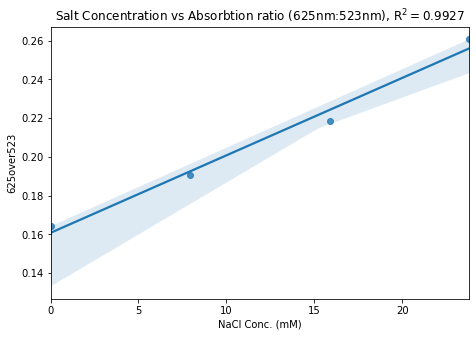

In [23]:
df = SaltAndAptamer.loc[[523,625], ["Post Alsa1535 (n=3)"]+[x for x in SaltAndAptamer.columns if "NaCl" in x]].T
df["625over523"] = df[625].astype(float)/df[523].astype(float)
df["NaCl Conc. (mM)"] = [0, 7.93, 15.9, 23.8]


display(df)

linearFits = getLinearFits(df, "NaCl Conc. (mM)", [625, 523, "625over523"])

display(linearFits)

ax = sns.regplot(x="NaCl Conc. (mM)", y="625over523", data=df)
ax.set_title("Salt Concentration vs Absorbtion ratio (625nm:523nm), R$^2={}$"
             .format(round(linearFits.loc["r_value", "625over523"],4)))


,BASELINE,5NM,50NM,100NM,200NM,300NM,600NM,900NM,1200NM,4800NM,8400NM,12000NM
Wavelength,,,,,,,,,,,,
750.0,0.2864,0.2858,0.2937,0.2993,0.3067,0.3171,0.3380,0.3686,0.4017,0.6045,0.8270,0.9606
749.0,0.2872,0.2873,0.2949,0.3002,0.3079,0.3188,0.3398,0.3704,0.4039,0.6096,0.8333,0.9676
748.0,0.2887,0.2885,0.2968,0.3019,0.3095,0.3204,0.3419,0.3730,0.4072,0.6153,0.8402,0.9743
747.0,0.2900,0.2898,0.2980,0.3031,0.3108,0.3219,0.3440,0.3754,0.4099,0.6207,0.8470,0.9814
746.0,0.2914,0.2913,0.2995,0.3048,0.3129,0.3241,0.3460,0.3782,0.4131,0.6268,0.8545,0.9888
...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


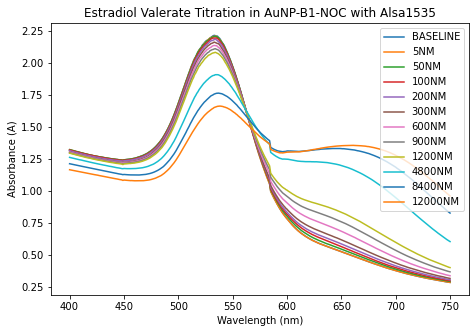

In [24]:
E2 = pd.read_excel("05272020-E2-ADDITIONS.xlsx", skiprows=10, index_col=0,
                     usecols=lambda x: not any(s in x for s in ["Abs", "No.", "Unnamed", "Remark", 
                                                                "Conc.", "Abs10", "Visible"]))
display(E2)
ax = E2.plot()
setWLSAxis(ax)
ax.set_title("Estradiol Valerate Titration in AuNP-B1-NOC with Alsa1535")
plt.savefig("05272020-e2-additions-curve.png", dpi=300)

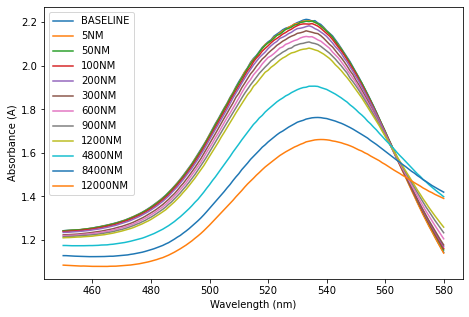

In [25]:
ax = E2.loc[580:450, :].plot()
setWLSAxis(ax)

In [26]:
df = E2.loc[[523,625], :].T
df["625over523"] = df[625]/df[523]
df["E2V Conc. (nM)"] = [0, 5, 50, 100, 200, 300, 600, 900, 1200, 4800, 8400, 12000]

Wavelength,523.0,625.0,625over523,E2V Conc. (nM)
BASELINE,2.1453,0.6081,0.283457,0
5NM,2.1403,0.6072,0.283699,5
50NM,2.1403,0.6302,0.294445,50
100NM,2.1259,0.6523,0.306835,100
200NM,2.1120,0.6725,0.318419,200
300NM,2.0941,0.7042,0.336278,300
600NM,2.0685,0.7699,0.372202,600
900NM,2.0444,0.8397,0.410732,900
1200NM,2.0142,0.9064,0.450005,1200
4800NM,1.8345,1.2269,0.668793,4800


,625,523,625over523
slope,0.000065,-4.818046e-05,4.919550e-05
intercept,0.700565,2.113024e+00,3.285755e-01
r_value,0.922475,-9.873044e-01,9.647174e-01
p_value,0.000019,2.542745e-09,4.058253e-07
std_err,0.000009,2.451199e-06,4.245758e-06


STR


Text(0.5, 1.0, 'Salt Concentration vs Absorbtion ratio (625nm:523nm), R$^2=0.9647$')

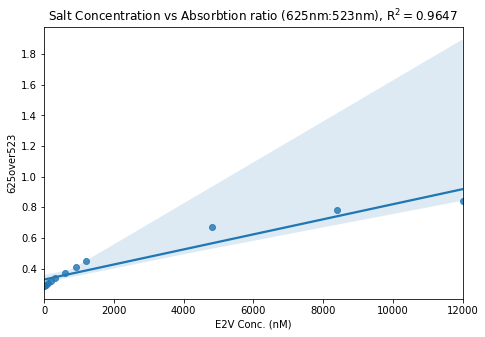

In [28]:
display(df)

linearFits = getLinearFits(df, "E2V Conc. (nM)", [625, 523, "625over523"])

display(linearFits)

print("STR")

ax = sns.regplot(x="E2V Conc. (nM)", y="625over523", data=df)
ax.set_title("Salt Concentration vs Absorbtion ratio (625nm:523nm), R$^2={}$"
             .format(round(linearFits.loc["r_value", "625over523"],4)))

Wavelength,523.0,625.0,625over523,E2V Conc. (nM)
BASELINE,2.1453,0.6081,0.283457,0
5NM,2.1403,0.6072,0.283699,5
50NM,2.1403,0.6302,0.294445,50
100NM,2.1259,0.6523,0.306835,100
200NM,2.1120,0.6725,0.318419,200
300NM,2.0941,0.7042,0.336278,300
600NM,2.0685,0.7699,0.372202,600
900NM,2.0444,0.8397,0.410732,900
1200NM,2.0142,0.9064,0.450005,1200


,625,523,625over523
slope,2.454628e-04,-1.071154e-04,1.365924e-04
intercept,6.185525e-01,2.138264e+00,2.886448e-01
r_value,9.967999e-01,-9.903263e-01,9.975058e-01
p_value,6.085192e-09,2.904142e-07,2.545327e-09
std_err,7.440122e-06,5.672607e-06,3.653186e-06


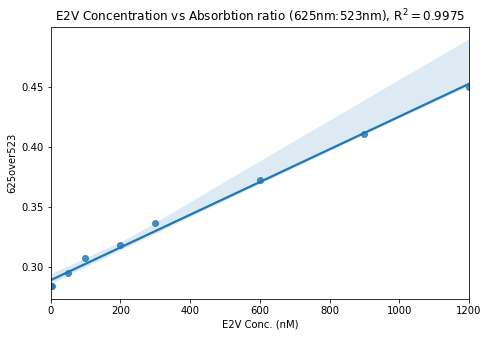

In [29]:
dff = df.drop(["4800NM", "8400NM", "12000NM"])
display(dff)

linearFits = getLinearFits(dff, "E2V Conc. (nM)", [625, 523, "625over523"])

display(linearFits)

ax = sns.regplot(x="E2V Conc. (nM)", y="625over523", data=dff)
ax.set_title("E2V Concentration vs Absorbtion ratio (625nm:523nm), R$^2={}$"
             .format(round(linearFits.loc["r_value", "625over523"],4)))
plt.savefig("estradiolValerateTitrationLinearFit.png", dpi=300)

### The results above cannot be attributed to the absorbtion spectrum of estradiol valerate

- The effects are too large
- The effects are not fully consistent with the absorbtion spectrum of estradiol (below)

,Blank,Abs2,Abs3,Abs4,Abs5,Abs6,Abs7,Abs8,Abs9,Abs10,Abs11,Abs12,Abs13
Wavelength,,,,,,,,,,,,,
750.0,-0.0003,-0.0001,0.0000,0.0001,0.0000,-0.0004,-0.0004,-0.0005,-0.0005,-0.0004,-0.0006,-0.0004,-0.0008
749.5,-0.0002,0.0002,0.0004,0.0000,0.0001,-0.0005,-0.0002,-0.0004,-0.0003,-0.0006,-0.0004,-0.0004,-0.0007
749.0,-0.0001,0.0003,0.0004,0.0001,0.0002,-0.0003,0.0000,-0.0005,-0.0005,-0.0005,-0.0002,-0.0002,-0.0006
748.5,-0.0001,-0.0001,0.0001,0.0000,-0.0004,-0.0005,-0.0002,-0.0005,-0.0003,-0.0008,-0.0006,-0.0008,-0.0007
748.0,-0.0002,0.0001,0.0004,0.0004,0.0000,-0.0002,-0.0001,-0.0001,0.0000,-0.0003,-0.0001,-0.0002,-0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402.0,0.0000,0.0048,0.0047,0.0046,0.0047,0.0045,0.0044,0.0045,0.0046,0.0045,0.0046,0.0047,0.0049
401.5,0.0000,0.0049,0.0050,0.0046,0.0048,0.0045,0.0044,0.0043,0.0044,0.0045,0.0044,0.0046,0.0049
401.0,0.0003,0.0054,0.0055,0.0049,0.0050,0.0050,0.0048,0.0048,0.0047,0.0050,0.0049,0.0049,0.0053


<AxesSubplot:xlabel='Wavelength'>

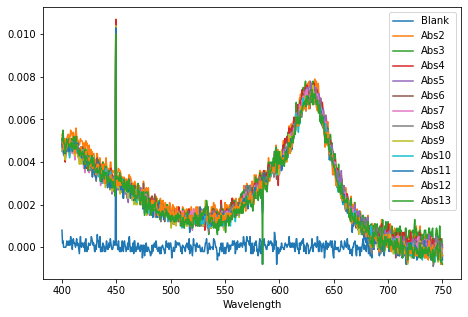

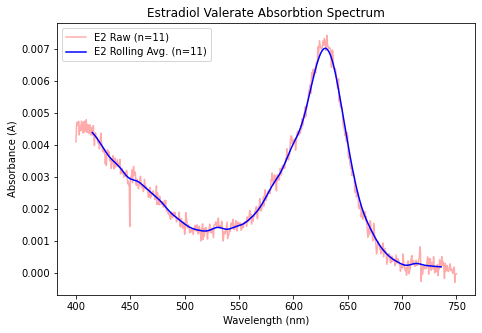

In [30]:
rawE2 = pd.read_excel("05292020-E2-FULLBANDSCAN.xlsx", skiprows=12, index_col=0, 
                      usecols=["Abs{}".format(i) for i in range(1,14)]+["Wavelength"])

rawE2.rename(columns={"Abs1":"Blank"}, inplace=True)
display(rawE2)
display(rawE2.plot())

window = 30
windowType = "triang"
rollingE2 = rawE2.rolling(window, win_type=windowType).mean()
newCol = "E2 Raw (n=11)"
combineMultipleScans(rollingE2, "Abs", newName=newCol)
rollingE2["E2 Rolling Avg. (n=11)"] = rollingE2["E2 Raw (n=11)"]-rollingE2["Blank"]
rollingE2 = rollingE2.rolling(window, win_type=windowType).mean()

plt.show()

combineMultipleScans(rawE2, "Abs", newName="E2 Raw (n=11)")
rawE2["E2 Raw (n=11)"] = rawE2["E2 Raw (n=11)"]-rawE2["Blank"]
rawE2.shift()


ax = sns.lineplot(x=rawE2.index, y="E2 Raw (n=11)", data=rawE2, color="red", label="E2 Raw (n=11)", alpha=0.33)
ax = sns.lineplot(x=rollingE2.index, y="E2 Rolling Avg. (n=11)", 
                  label="E2 Rolling Avg. (n=11)", color="blue",
                  data=rollingE2.shift(-window), ax=ax, alpha=1)
setWLSAxis(ax)
ax.set_title("Estradiol Valerate Absorbtion Spectrum")
plt.savefig("estradiol-valerate-abs.png", dpi=300)